<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 6


## NLP and Machine Learning on [travel.statsexchange.com](http://travel.stackexchange.com/) data

---

In Project 7 you'll be doing NLP and machine learning on post data from stackexchange's travel subdomain. 

This project is setup like a mini Kaggle competition. You are given the training data and when projects are submitted your model will be tested on the held-out testing data. There will be prizes for the people who build models that perform best on the held out test set!

---

## Notes on the data

The data is again compressed into the `.7z` file format to save space. There are 6 .csv files and one readme file that contains some information on the fields.

    posts_train.csv
    comments_train.csv
    users.csv
    badges.csv
    votes_train.csv
    tags.csv
    readme.txt
    
The data is located in your datasets folder:

    DSI-SF-2/datasets/stack_exchange_travel.7z
    
If you're interested in where this data came from and where to get more data from other stackexchange subdomains, see here:

https://ia800500.us.archive.org/22/items/stackexchange/readme.txt


### Recommended Utilities for .7z

- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.



note from Kelly: will be doin NLP for capstone so won't do this project. Finished numer.ai.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use LDA to find what topics are discussed on travel.stackexchange.com.

---

Text can be found in the posts and the comments datasets. The `ParentId` column in the posts dataset indicates what the "question" post was for a given post. Comment text can be merged onto the post they are part of with the `PostId` field.

The text may have some HTML tags. BeautifulSoup has convenient ways to get rid of markup or extract text if you need to. You can also parse the strings yourself if you like.

The tags dataset has the "tags" that the users have officially given the post.

**1.1 Implement LDA against the text features of the dataset(s).**

- This can be posts or a combination of posts and comments if you want more power.
- Find optimal **K/num_topics**.

**1.2 Compare your topics to the tags. Do the LDA topics make sense? How do they compare to the tags?**


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. What makes an answer likely to be "accepted"?

---

**2.1 Build a model to predict whether a post will be marked as the answer.**

- This is a classification problem.
- You're free to use any of the machine learning algorithms or techniques we have learned in class to build the best model you can.
- NLP will be very useful here for pulling out useful and relevant features from the data. 
- Though not required, using bagging and boosting models like Random Forests and Gradient Boosted Trees will _probably_ get you the highest performance on the test data (but who knows!).


**2.2 Evaluate the performance of your classifier with a confusion matrix and accuracy. Explain how your model is performing.**

**2.3 Plot either a ROC curve or precision-recall curve (or both!) and explain what they tell you about your model.**

NOTE: You should only be predicting this for `PostTypeID=2` posts, which are the "answer" posts. This doesn't mean, however, that you can't or shouldn't use the parent questions as predictors!


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. What is the score of a post?

---

**3.1 Build a model that predicts the score of a post.**

- This is a regression problem now. 
- You can and should be predicting score for both "question" and "answer" posts, so keep them both in your dataset.
- Again, use any techniques that you think will get you the best model.

**3.2 Evaluate the performance of your model with cross-validation and report the results.**

**3.3 What is important for determining the score of a post, if anything?**


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. How many views does a post have?

---

**4.1 Build a model that predicts the number of views a post has.**

- This is another regression problem. 
- Predict the views for all posts, not just the "answer" posts.

**4.2 Evaluate the performance of your model with cross-validation and report the results.**

**4.3 What is important for the number of views a post has, if anything?**

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5. Build a pipeline or other code to automate evaluation of your models on the test data.

---

Now that you've constructed your three predictive models, build a pipeline or code that can easily load up the raw testing data and evaluate your models on it.

The testing data that is held out is in the same raw format as the training data you have. _Any cleaning and preprocessing that you did on the training data will need to be done on the testing data as well!_

This is a good opportunity to practice building pipelines, but you're not required to. Custom functions and classes are fine as long as they are able to process and test the new data.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Lets Model - Tournament for stock market predictions

>Start this section of the project by downloading the train and test datasets from the following site: https://numer.ai/rules

> - The data set is clean, your goal is to develop a classification model(s) 
> - Report all the results including log loss, and other coefficients you consider iteresting

In [1]:
import pandas as pd
import numpy as np

In [3]:
numerai = pd.read_csv("/Users/KerryChowChow/DSI-SF-3-kelly/projects/project6/numerai_datasets/numerai_training_data.csv")

In [4]:
numerai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96320 entries, 0 to 96319
Data columns (total 22 columns):
feature1     96320 non-null float64
feature2     96320 non-null float64
feature3     96320 non-null float64
feature4     96320 non-null float64
feature5     96320 non-null float64
feature6     96320 non-null float64
feature7     96320 non-null float64
feature8     96320 non-null float64
feature9     96320 non-null float64
feature10    96320 non-null float64
feature11    96320 non-null float64
feature12    96320 non-null float64
feature13    96320 non-null float64
feature14    96320 non-null float64
feature15    96320 non-null float64
feature16    96320 non-null float64
feature17    96320 non-null float64
feature18    96320 non-null float64
feature19    96320 non-null float64
feature20    96320 non-null float64
feature21    96320 non-null float64
target       96320 non-null int64
dtypes: float64(21), int64(1)
memory usage: 16.2 MB


In [12]:
numerai_10 = numerai.sample(frac = 0.1)

In [5]:
numerai_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9632 entries, 76732 to 91933
Data columns (total 22 columns):
feature1     9632 non-null float64
feature2     9632 non-null float64
feature3     9632 non-null float64
feature4     9632 non-null float64
feature5     9632 non-null float64
feature6     9632 non-null float64
feature7     9632 non-null float64
feature8     9632 non-null float64
feature9     9632 non-null float64
feature10    9632 non-null float64
feature11    9632 non-null float64
feature12    9632 non-null float64
feature13    9632 non-null float64
feature14    9632 non-null float64
feature15    9632 non-null float64
feature16    9632 non-null float64
feature17    9632 non-null float64
feature18    9632 non-null float64
feature19    9632 non-null float64
feature20    9632 non-null float64
feature21    9632 non-null float64
target       9632 non-null int64
dtypes: float64(21), int64(1)
memory usage: 1.7 MB


In [5]:
numerai.head().T

,0,1,2,3,4
feature1,0.919013,0.432089,0.540382,0.463623,0.301319
feature2,0.175979,0.351883,0.455780,0.064658,0.177891
feature3,0.101359,0.304700,0.827779,0.593650,0.724596
feature4,0.666598,0.896531,0.599250,0.919549,0.303711
feature5,0.580599,0.405688,0.557706,0.241829,0.750088
feature6,0.921771,0.816737,0.652918,0.778215,0.875587
feature7,0.389600,0.469452,0.320100,0.810370,0.286873
feature8,0.481728,0.532358,0.514789,0.454875,0.563292
feature9,0.024934,0.484844,0.287147,0.003836,0.363022
feature10,0.909278,1.000000,0.520798,0.860052,0.726946


In [7]:
numerai.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,96320.0,0.492073,0.282503,0.000000,0.242726,0.491664,0.737396,1.0
feature2,96320.0,0.502368,0.289907,0.000029,0.256339,0.504819,0.756079,1.0
feature3,96320.0,0.489291,0.287124,0.000000,0.238734,0.477203,0.735871,1.0
feature4,96320.0,0.509141,0.291121,0.000000,0.269589,0.501874,0.760353,1.0
feature5,96320.0,0.488995,0.284881,0.000000,0.247342,0.490200,0.713748,1.0
feature6,96320.0,0.499417,0.284566,0.000000,0.258420,0.491724,0.745610,1.0
feature7,96320.0,0.491723,0.283758,0.000000,0.250155,0.498701,0.725119,1.0
feature8,96320.0,0.480110,0.287291,0.000181,0.230062,0.465147,0.726752,1.0
feature9,96320.0,0.487441,0.287196,0.000000,0.238328,0.481909,0.718227,1.0
feature10,96320.0,0.508945,0.289275,0.000000,0.259184,0.521147,0.753798,1.0


In [3]:
nu_corr = numerai.iloc[:, :-1].corr()

In [4]:
### Graphing
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# Plot within the jupyter notebook
%matplotlib inline
# Basically, the HD version
%config InlineBackend.figure_format = 'retina'


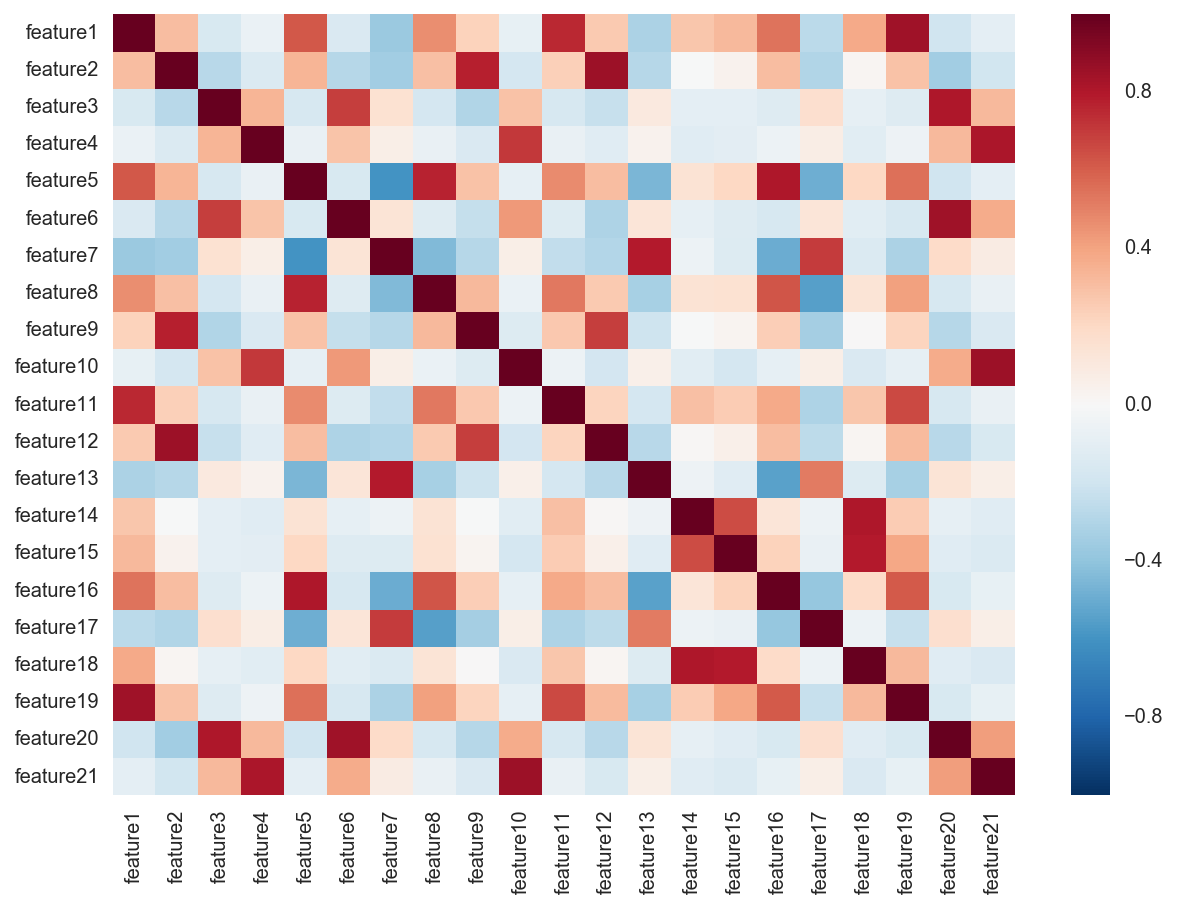

In [24]:
fig = plt.figure(figsize=(9,7))
sns.heatmap(nu_corr)

In [67]:
y = numerai['target']
X = numerai.iloc[:, :-1]

In [89]:
Y = np.zeros((y.shape[0], 2))
for idx, item in enumerate(y):
    Y[idx, item] = 1

In [90]:
Y

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [70]:
logit = LogisticRegression()
logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
-np.mean(np.log(logit.predict_proba(X))  * Y)

0.34567685154369021

In [22]:
y10 = numerai_10['target']
X10 = numerai_10.iloc[:, :-1]

In [23]:
## Setting up train-test split
from sklearn.cross_validation import train_test_split

trainX, testX, trainY, testY = train_test_split(X10, y10, train_size=0.7, stratify=y10) # Can also use test_size
print trainX.shape, testX.shape
print trainY.shape, trainY.shape

(6742, 21) (2890, 21)
(6742,) (6742,)


In [7]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV

In [26]:
from sklearn.metrics import log_loss

In [27]:
"""
building a helper function to compare the results of each model
"""
def evaluate_model(model, param):
    #trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.7, stratify=y, random_state = 42)
    #random_state vs stratefy: 
    fit_model = model.fit(trainX, trainY)
    y_pred = fit_model.predict(testX)
    
    estimator = GridSearchCV(model, param_grid = param, cv=5, verbose=1, n_jobs=-1)
    # Fit some data!
    results = estimator.fit(trainX, trainY)
    print "Parameter used: ", results.param_grid
    print "\n====================\n"
    print "Best score acheived: ", results.best_score_
    print "\n====================\n"
    best_model= results.best_estimator_
    
    print "Best model:" , best_model
    print "\n====================\n"
    print "Best param: ", results.best_params_ 
    print "\n====================\n"
    
    evaluate_dict['model'].append(model)
    evaluate_dict['param'].append(results.best_params_)
    
    
    #score = accuracy_score(y_pred, testY)
    #print "Accuracy score: ", score
    #evaluate_dict['score'].append(score)
    
    y_true = testY
    
    print "log loss: ", log_loss(y_true, y_pred)
    
    
    """prints the confusion matrix and the classification report"""
    #confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    #print confusion
    #print "\n====================\n"
    #print classification_report(y_true, y_pred)


In [9]:
evaluate_dict = {
    'model': [],
    'score':[],
    'param':[]
}

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Assign knn as a KNeighborsClassifier function
knn = KNeighborsClassifier() # uniform or distance
knn_p = {'n_neighbors': range(1,100),
         'weights': ['distance','uniform'],
         #'algorithm': ['auto', 'ball_tree', 'kd_tree'], 
}

evaluate_model(knn, knn_p)
#THIS IS THE OUTCOME OF USING 10% OF THE DATASET

Fitting 5 folds for each of 198 candidates, totalling 990 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min


Parameter used:  {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['distance', 'uniform']}


Best score acheived:  0.524325126075


Best model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=85, p=2,
           weights='distance')


Best param:  {'n_neighbors': 85, 'weights': 'distance'}


log loss:  17.173982209


[Parallel(n_jobs=-1)]: Done 990 out of 990 | elapsed:  4.4min finished


In [29]:
knn_best = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=85, p=2,
           weights='distance')
fit_knn = knn_best.fit(trainX, trainY)
y_pred = fit_knn.predict(testX)
y_true = testY

print "log loss: ", log_loss(y_true, y_pred)

log loss:  16.6242640901


In [48]:
log_dict = { "best_model":[],
            "log_loss": []
    
}

def log_func(model):
    fit_model = model.fit(trainX, trainY)
    y_pred = fit_model.predict(testX)
    y_true = testY
    loss = log_loss(y_true, y_pred)
    print "log loss: ", loss
    log_dict['best_model'].append(model)
    log_dict['log_loss'].append(loss)

# The accuracy score is really low with KNN

In [16]:
evaluate_dict

{'model': [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform'),
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')],
 'param': [{'n_neighbors': 1, 'weights': 'distance'},
  {'n_neighbors': 10, 'weights': 'distance'}],
 'score': [0.49134948096885811, 0.49134948096885811]}

# Bagging + KNN

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_best = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')
bag_p = {
         'max_features': [0.5,1.0],
        }
bag_knn = BaggingClassifier(base_estimator= knn_best, warm_start = True)

# With bagging, it's slightly better.

# Logistic

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_p = { 'penalty': ['l1', 'l2'],
         'C': [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    
}

In [11]:
evaluate_model(lr, lr_p)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.0min finished


Parameter used:  {'penalty': ['l1', 'l2'], 'C': [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


Best score acheived:  0.521342548647


Best model: LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Best param:  {'penalty': 'l1', 'C': 0.3}


Accuracy score:  0.523325027685
Predicted      0      1    All
Actual                        
0           6278   8021  14299
1           5753   8844  14597
All        12031  16865  28896


             precision    recall  f1-score   support

          0       0.52      0.44      0.48     14299
          1       0.52      0.61      0.56     14597

avg / total       0.52      0.52      0.52     28896



## Logistic regression on the entire dataset ^

In [31]:
best_lg = LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
log_func(best_lg)

log loss:  16.6959700622


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_p = {'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_features':[3,6,12],
        'max_depth': [10,30,60],
          
}

In [41]:
evaluate_model(dt, dt_p)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Parameter used:  {'max_features': [3, 6, 12], 'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 30, 60]}


Best score acheived:  0.518985464254


Best model: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Best param:  {'max_features': 3, 'splitter': 'best', 'criterion': 'entropy', 'max_depth': 10}


log loss:  17.3532447877


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.2s finished


In [42]:
dt_best = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [43]:
bag_dt = BaggingClassifier(base_estimator= dt_best, warm_start = True)

In [50]:
log_func(bag_dt)

log loss:  16.660096187


//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/ensemble/bagging.py:313: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [51]:
log_dict

{'best_model': [LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
              max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=None, splitter='best'),
           bootstrap=True, bootstrap_features=False, max_features=1.0,
           max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
           random_state=None, verbose=0, warm_start=True)],
 'log_loss': [16.695970062247614, 16.660096187024582]}

# SVM

In [52]:
from sklearn.svm import SVC

svm_c = SVC()

svm_p = {'C': [0.1, 0.5, 0.6, 0.8, 1.0],
         'kernel': ['linear', 'rbf' ]
    
}

In [53]:
evaluate_model(svm_c , svm_p)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   46.6s finished


Parameter used:  {'kernel': ['linear', 'rbf'], 'C': [0.1, 0.5, 0.6, 0.8, 1.0]}


Best score acheived:  0.529664787897


Best model: SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Best param:  {'kernel': 'rbf', 'C': 0.6}


log loss:  16.552629224


In [54]:
best_svm = SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
log_func(best_svm)

log loss:  16.4809271253


In [56]:
log_dict

{'best_model': [LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
              max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=None, splitter='best'),
           bootstrap=True, bootstrap_features=False, max_features=1.0,
           max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
           random_state=None, verbose=0, warm_start=True),
  SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=

# Random Forest Classifier

In [61]:
X.columns

Index([u'feature1', u'feature2', u'feature3', u'feature4', u'feature5',
       u'feature6', u'feature7', u'feature8', u'feature9', u'feature10',
       u'feature11', u'feature12', u'feature13', u'feature14', u'feature15',
       u'feature16', u'feature17', u'feature18', u'feature19', u'feature20',
       u'feature21'],
      dtype='object')

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_c = RandomForestClassifier()
rf_p = {
    "n_estimators": [10,20],
    "criterion": ['gini', 'entropy'],
    "max_features": ['auto', 'sqrt','log2',5, 10, 21]
}

In [63]:
evaluate_model(rf_c, rf_p)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   46.1s finished


Parameter used:  {'n_estimators': [10, 20], 'max_features': ['auto', 'sqrt', 'log2', 5, 10, 21], 'criterion': ['gini', 'entropy']}


Best score acheived:  0.515129041827


Best model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Best param:  {'max_features': 'sqrt', 'n_estimators': 20, 'criterion': 'entropy'}


log loss:  16.9349130532


In [64]:
best_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
log_func(best_rf)

log loss:  17.0305301464


In [66]:
log_dict

{'best_model': [LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
              max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=None, splitter='best'),
           bootstrap=True, bootstrap_features=False, max_features=1.0,
           max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
           random_state=None, verbose=0, warm_start=True),
  SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=